# PAD Project 2022-2023

---
# Part III

## Principal Component Analysis

1. Select a subset of 3 to 6 features related to the same aspect of the phenomenon to which your data set relates to. Explain your choice.

2. Visualize the data over these features in 2D/3D PC plane using two types of normalization: by **range** and by **standard deviations**.

3. Choose between **conventional PCA** or **SVD** for the visualization. Make a comment whether one of the normalizations is better and why.

4. At these visualizations, use a distinct shape/colour for data points representing a pre‐specified, by yourself, group of objects. Comment on the choice of your groups.

5. Calculate and make a graphical presentation of the **quality** of the PC projection of your data. Discuss your results.

### Breast Cancer Wisconsin (Diagnostic) Data Set

https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy

#interactive plot
# Please consult information to update plotly.offline 
# e.g. https://medium.com/plotly/plotly-py-4-0-is-here-offline-only-express-first-displayable-anywhere-fc444e5659ee
import plotly
from plotly.offline import plot
from plotly.graph_objs import *

# Apply the default theme to seaborn
sns.set_theme()

### PCA - Principal Component Analysis

In [2]:
def PCA(X, n_components):
    """
    Principal Component Analysis
    
    input
    - X: data matrix
    - n_components: number of components returned
    
    output
    - PCA_X: projection of X in the reduced space
    - eigenvalues
    - eigenvectors
    """
    ## Centering the data matrix
    mean_values = np.mean(X, axis=0) 
    centered_X = X - mean_values 
    
    # Computing the covariance matrix
    covariance_matrix = np.cov(centered_X.T)
    
    # Compute the eigenvalues and right eigenvectors of the covarinace matrix
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
    
    # Retrieving the index of the eigenvalues in descending order
    idx_order = np.argsort(eigenvalues)[::-1]
    
    # Sorting the eigenvectors according to idx_order
    eigenvalues = eigenvalues[idx_order]
    eigenvectors = eigenvectors[:, idx_order]
    
    # Select the first n principal components
    PC = eigenvectors[:, 0:n_components]
    
    # Computing the projection on the reduced space
    PCA_X = centered_X.dot(PC)
    
    return PCA_X, eigenvalues, eigenvectors

### SVD - Singular Value Decomposition

In [3]:
def SVD(X, n):
    """
    Singular Value Decomposition.
    
    input
    - X: data matrix
    - n: number of dimension in the reduced space
    
    output:
    - SVD_X: reduced space
    - s: vectors with the singular values
    - vh.T: singular vectors
    
    """
    ## Centering the data matrix
    mean = np.mean(X, axis=0) 
    centered_X = X - mean
    
    u, s, vh = np.linalg.svd(centered_X)
    
    # Selecting the first n singular vectors
    SV = vh.T[:, 0:n]
    
    # Computing the projection on the reduced space
    SVD_X = centered_X.dot(SV)
    
    return SVD_X, s, vh.T

### Normalization by Range

In [4]:
# Normalization by Range

def norm_by_range(X):
    """
    Normalization by Range
    
    input
    X: data matrix
    
    output
    norm_by_range_X: data normalized by range
    """
    mean_values = np.mean(X, axis=0) 
    max_values = np.max(X, axis=0)
    min_values = np.min(X, axis=0)
    norm_by_range_X = (X-mean_values)/(max_values-min_values)
    
    return norm_by_range_X

### Normalization by Standard Deviation

In [5]:
# Normalization by Standard deviation

def norm_by_std(X):
    """
    Normalization by Standard deviation
    
    input
    X: data matrix
    
    output
    norm_by_range_X: data normalized by std
    """
    mean_values = np.mean(X, axis=0) 
    std_values = np.std(X, axis=0)
    norm_by_std_X = (X-mean_values)/std_values
    
    return norm_by_std_X

----

### Features Selection
1. Select a subset of 3 to 6 features related to the same aspect of the phenomenon to which your data set relates to.

In [7]:
# Loading the dataset as a pandas df
data = pd.read_csv("../data/breast_cancer_mod.csv")
data.head()

,diagnosis_M,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
# Selecting six features
X = data[['radius_mean', 
          'texture_mean', 
          'smoothness_mean', 
          'compactness_mean', 
          'concavity_mean', 
          'fractal_dimension_mean']].values

X.shape

(569, 6)

### Data Normalization (by standard deviation & by range)

In [11]:
# Normalization by Standard Deviation
norm_by_std_X = norm_by_std(X)
norm_by_std_X.shape

(569, 6)

In [12]:
# Normalization by Range
norm_by_range_X = norm_by_range(X)
norm_by_range_X.shape

(569, 6)

---
### PCA vs SVD
2. Visualize the data over these features in 2D/3D PC plane using two types of normalization: by **range** and by **standard deviations**.

In [13]:
# PCA - Principal Component Analysis

# PCA on X normalized by Range
PCA_results_range = PCA(norm_by_range_X, n_components=3)
PCA_norm_by_range_X = PCA_results_range[0] 
print(PCA_norm_by_range_X.shape)

# PCA on X normalized by Standard Deviation
PCA_results_std = PCA(norm_by_std_X, n_components=3)
PCA_norm_by_std_X = PCA_results_std[0]
print(PCA_norm_by_std_X.shape)

(569, 3)
(569, 3)


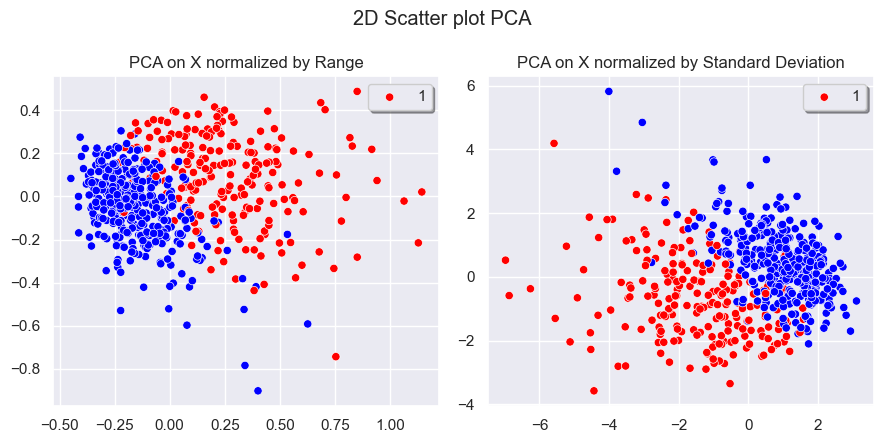

In [14]:
# 2D Scatter plots
fig, axes = plt.subplots(1, 2, figsize=(9, 4.5), tight_layout=True)
fig.suptitle('2D Scatter plot PCA')

# Normalization by Range
sns.scatterplot(PCA_norm_by_range_X, 
                x=PCA_norm_by_range_X[:,0], 
                y=PCA_norm_by_range_X[:,1], 
                c=data['diagnosis_M'],
                cmap='bwr',
                ax=axes[0])
axes[0].set_title('PCA on X normalized by Range')
axes[0].legend(data['diagnosis_M'], shadow=True)

# Normalization by Standard Deviation
sns.scatterplot(PCA_norm_by_std_X, 
                x=PCA_norm_by_std_X[:,0], 
                y=PCA_norm_by_std_X[:,1], 
                c=data['diagnosis_M'],
                cmap='bwr',
                ax=axes[1])
axes[1].set_title('PCA on X normalized by Standard Deviation')
axes[1].legend(data['diagnosis_M'], shadow=True)

plt.show()

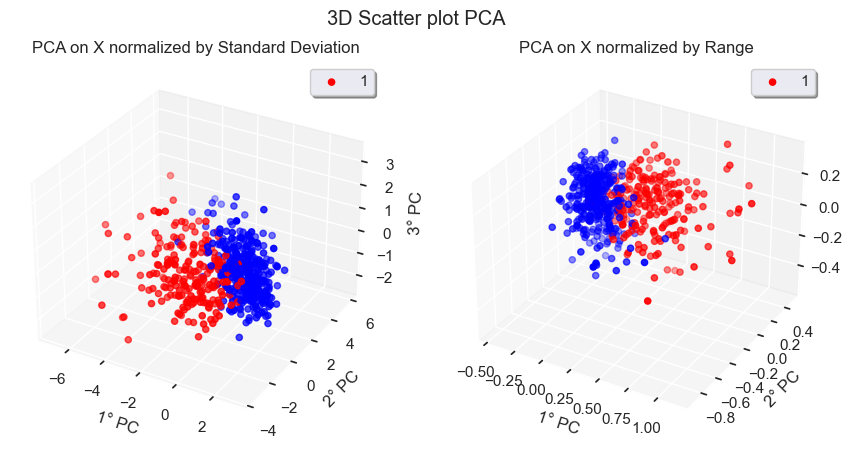

In [15]:
# 3D Scatter Plot
fig = plt.figure(figsize=(9, 4.5), tight_layout=True)
fig.suptitle('3D Scatter plot PCA')

# Normalization by Standard Deviation
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter(PCA_norm_by_std_X[:,0], 
           PCA_norm_by_std_X[:,1], 
           PCA_norm_by_std_X[:,2],
           c=data['diagnosis_M'],
           cmap='bwr')
ax.legend(data['diagnosis_M'], shadow=True)
ax.set_title('PCA on X normalized by Standard Deviation')
ax.set_xlabel('1° PC')
ax.set_ylabel('2° PC')
ax.set_zlabel('3° PC')
ax.set_facecolor((0, 0, 0, 0))

# Normalization by Range
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter(PCA_norm_by_range_X[:,0], 
           PCA_norm_by_range_X[:,1], 
           PCA_norm_by_range_X[:,2], 
           c=data['diagnosis_M'],
           cmap='bwr')
ax.legend(data['diagnosis_M'], shadow=True)
ax.set_title('PCA on X normalized by Range')
ax.set_xlabel('1° PC')
ax.set_ylabel('2° PC')
ax.set_facecolor((0, 0, 0, 0))



plt.show()

---
### SVD - Singular Value Decomposition

In [16]:
# SVD - Singular Value Decomposition

# SVD on X normalized by Range
SVD_results_range = SVD(norm_by_range_X, n=3)
SVD_norm_by_range_X = SVD_results_range[0]
print(SVD_norm_by_range_X.shape)

# SVD on X normalized by Standard Deviation
SVD_results_std = SVD(norm_by_std_X, n=3)
SVD_norm_by_std_X = SVD_results_std[0]
print(SVD_norm_by_std_X.shape)

(569, 3)
(569, 3)


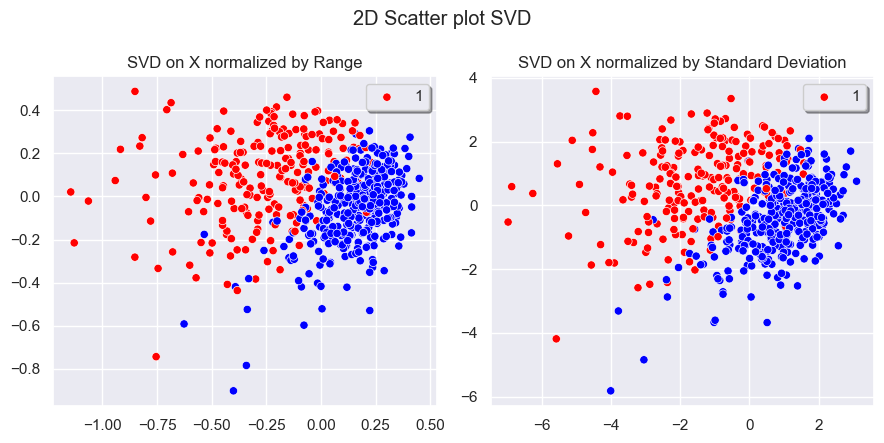

In [17]:
# 2D Scatter plots
fig, axes = plt.subplots(1, 2, figsize=(9, 4.5), tight_layout=True)
fig.suptitle('2D Scatter plot SVD')

# Normalization by Range
sns.scatterplot(SVD_norm_by_range_X, 
                x=SVD_norm_by_range_X[:,0], 
                y=SVD_norm_by_range_X[:,1], 
                c=data['diagnosis_M'],
                cmap='bwr',
                ax=axes[0])
axes[0].set_title('SVD on X normalized by Range')
axes[0].legend(data['diagnosis_M'], shadow=True)

# Normalization by Standard Deviation
sns.scatterplot(SVD_norm_by_std_X, 
                x=SVD_norm_by_std_X[:,0], 
                y=SVD_norm_by_std_X[:,1], 
                c=data['diagnosis_M'],
                cmap='bwr',
                ax=axes[1])
axes[1].set_title('SVD on X normalized by Standard Deviation')
axes[1].legend(data['diagnosis_M'], shadow=True)

plt.show()

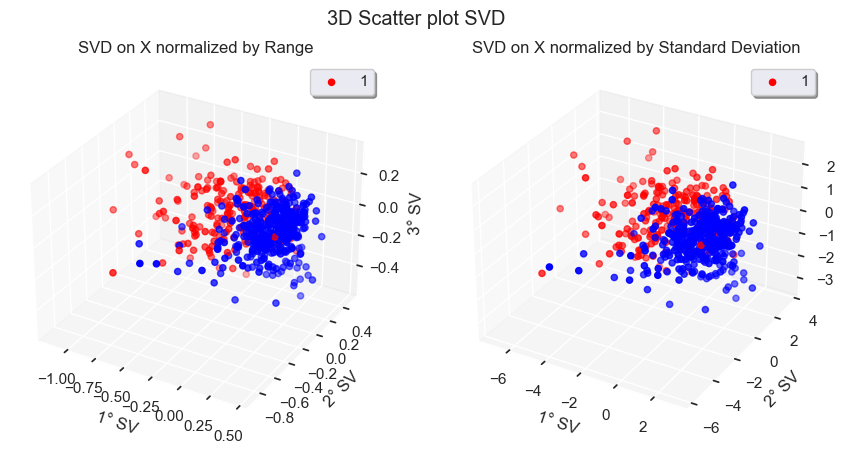

In [15]:
# 3D Scatter Plot
fig = plt.figure(figsize=(9, 4.5), tight_layout=True)
fig.suptitle('3D Scatter plot SVD')

# Normalization by Range
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter(SVD_norm_by_range_X[:,0], 
           SVD_norm_by_range_X[:,1], 
           SVD_norm_by_range_X[:,2], 
           c=data['diagnosis_M'],
           cmap='bwr')
ax.legend(data['diagnosis_M'], shadow=True)
ax.set_title('SVD on X normalized by Range')
ax.set_xlabel('1° SV')
ax.set_ylabel('2° SV')
ax.set_zlabel('3° SV')
ax.set_facecolor((0, 0, 0, 0))

# Normalization by Standard Deviation
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter(SVD_norm_by_std_X[:,0], 
           SVD_norm_by_std_X[:,1], 
           SVD_norm_by_std_X[:,2],
           c=data['diagnosis_M'],
           cmap='bwr')
ax.legend(data['diagnosis_M'], shadow=True)
ax.set_title('SVD on X normalized by Standard Deviation')
ax.set_xlabel('1° SV')
ax.set_ylabel('2° SV')
ax.set_zlabel('3° SV')
ax.set_facecolor((0, 0, 0, 0))

plt.show()

---
### Quality of PC Projection

5. Calculate and make a graphical presentation of the **quality** of the PC projection of your data. Discuss your results.

The ratio of the total variance of the Data captured by an r-projection is calculated as the ratio of the sum of square of the main *r* eigenvalues by the sum of of square of the *d* eigenvalues

In [18]:
# Eigenvalues PCA
eigenvalues_PCA_r = PCA_results_range[1]
eigenvalues_PCA_s = PCA_results_std[1]


# Tot variance PCA (sum of the eigenvalues)
tot_var_PCA = np.sum(PCA_results_range[1])
print(tot_var_PCA)

# Eigenvalues SVD
singular_values_SVD_r = SVD_results_range[1]
singular_values_SVD_s = SVD_results_std[0]

# Tot variance PCA (sum of the eigenvalues)
tot_var_SVD = np.sum(SVD_results_range[1])
print(tot_var_SVD)

0.14833746711617815
18.804246102813337


In [19]:
# Singular values of SVD vs Eigenvalues of PCA
print(eigenvalues_PCA_r[0])
print(singular_values_SVD_r[0]**2/X.shape[0])

0.08206695523227794
0.08192272508248495


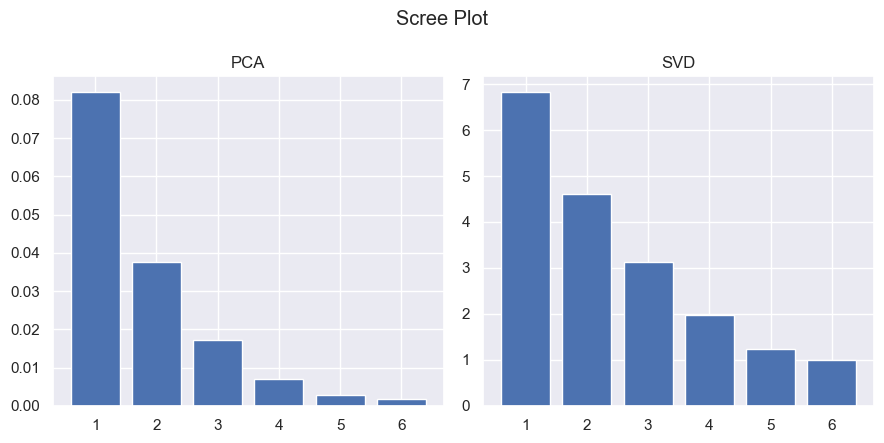

In [20]:
# Bar plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4.5), tight_layout=True)
fig.suptitle('Scree Plot')

# PCA
ax1.set_title('PCA')
ax1.bar(x=range(1,len(eigenvalues_PCA_r)+1), height=eigenvalues_PCA_r)

# SVD
ax2.set_title('SVD')
ax2.bar(x=range(1,len(singular_values_SVD_r)+1), height=singular_values_SVD_r)

plt.show()

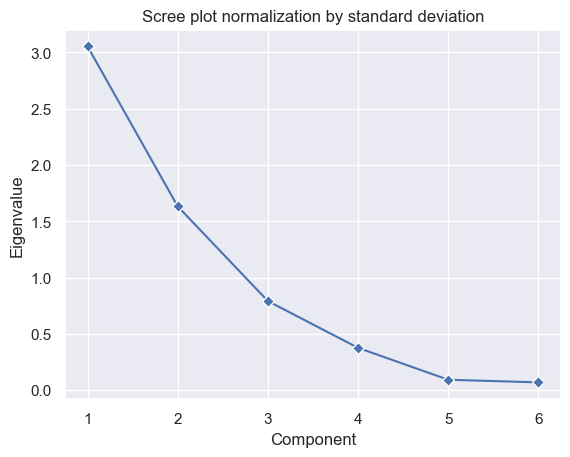

In [21]:
# Scree plot PCA by standard deviation
sns.set_theme(style="darkgrid")
plt.plot(range(1,len(eigenvalues_PCA_s)+1), eigenvalues_PCA_s, marker='D', mec='white')
plt.title('Scree plot normalization by standard deviation')
plt.xlabel('Component')
plt.ylabel('Eigenvalue')
plt.show()

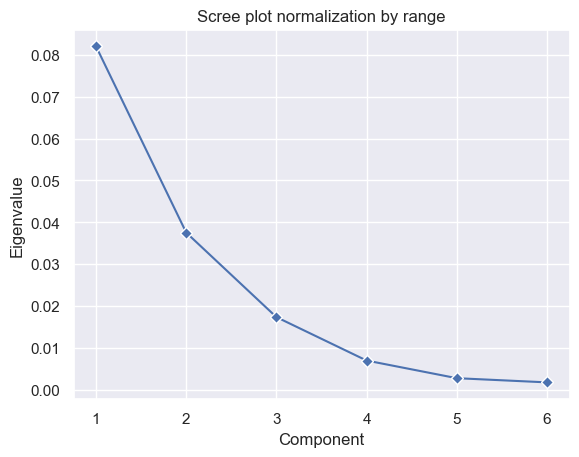

In [22]:
# Scree plot PCA by range
sns.set_theme(style="darkgrid")
plt.plot(range(1,len(eigenvalues_PCA_r)+1), eigenvalues_PCA_r, marker='D', mec='white')
plt.title('Scree plot normalization by range')
plt.xlabel('Component')
plt.ylabel('Eigenvalue')
plt.show()

In [23]:
## PCA Explained variance by different principal components - Range normalization

totVar = sum(eigenvalues_PCA_r)                          # Total variability of the Data
var_exp = [(e / totVar)*100 for e in eigenvalues_PCA_r]  # Variability Captured by the PC
cum_var_exp = np.cumsum(var_exp)                         # Cumulative Variability

trace1 = Bar(
        x=['PC %s' %i for i in range(1,7)],
        y=var_exp,
        name='Exp Var',
        showlegend=False)

trace2 = Scatter(
        x=['PC %s' %i for i in range(1,7)], 
        y=cum_var_exp,
        name='Cum. Exp Var')

data = [trace1, trace2]

fig = Figure(data=data)

fig.update_layout(
    title="Explained variance by different principal components (normalization by Range)",
    xaxis_title="PC",
    yaxis_title="Explained variance in percent",
    legend_title="Legend Title",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"))
    
plot(fig)
plt.show()

In [24]:
## PCA Explained variance by different principal components - Standard Deviation Normalization

totVar = sum(eigenvalues_PCA_s)                          # Total variability of the Data
var_exp = [(e / totVar)*100 for e in eigenvalues_PCA_s]  # Variability Captured by the PC
cum_var_exp = np.cumsum(var_exp)                         # Cumulative Variability

trace1 = Bar(
        x=['PC %s' %i for i in range(1,7)],
        y=var_exp,
        name='Exp Var',
        showlegend=False)

trace2 = Scatter(
        x=['PC %s' %i for i in range(1,7)], 
        y=cum_var_exp,
        name='Cum. Exp Var')

data = [trace1, trace2]

fig = Figure(data=data)

fig.update_layout(
    title="Explained variance by different principal components (normalization by Standard Deviation)",
    xaxis_title="PC",
    yaxis_title="Explained variance in percent",
    legend_title="Legend Title",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"))
    
plot(fig)
plt.show()